 # Exploratory Data Analysis – Correlation Investigation

## 1. Introduction
In this notebook, we explore the Stack Overflow Developer Survey dataset with a particular focus on investigating correlations between various factors and job satisfaction. The goal is to assess whether there are meaningful relationships in the data that could be leveraged to predict job satisfaction.

## 2. Data Loading and Overview
We begin by loading the dataset and taking a first look at the structure and completeness of the relevant variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 150)
df = pd.read_csv("./stack-overflow-developer-survey-2024/survey_results_public.csv")

In [2]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

## 3. Data Cleaning and Preprocessing
Here, we prepare the data for analysis. Several of the functions used in this section have been outsourced to `preprocessing.py` for later reuse in the model-building notebook.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

In [4]:
# The following columns are removed due to insufficient data or lack of relevance to our analysis.
df = df.drop(columns=['ResponseId', 'Check', 'Currency', 'CompTotal', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 
                      'SOPartFreq', 'SOHow', 'SOComm', 'AIToolNot interested in Using', 'AINextMuch more integrated', 
                      'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 
                      'AIEthics', 'SurveyLength', 'SurveyEase'])


<Axes: >

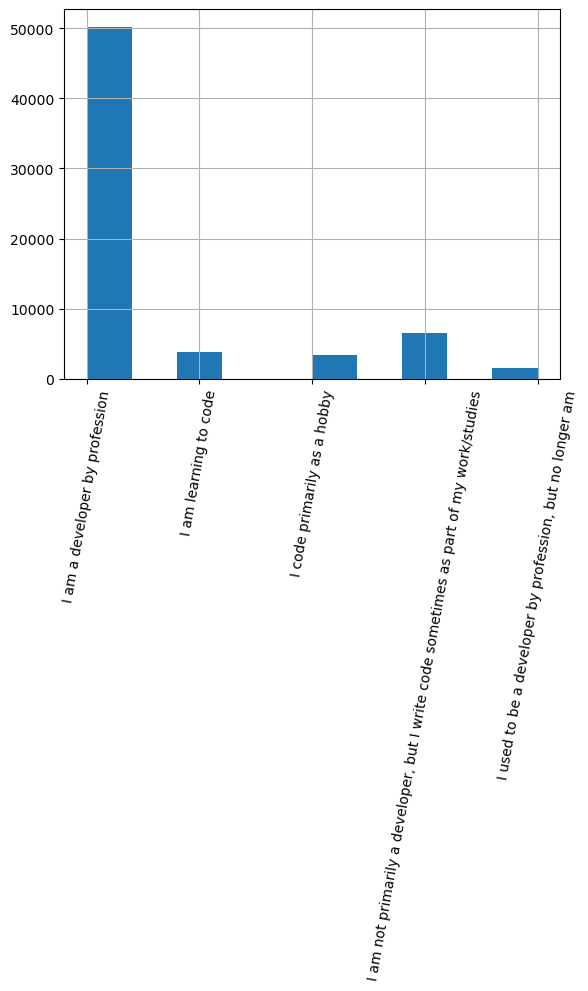

In [5]:
# How is the group of participants composed?
df['MainBranch'].hist( xrot=80)

<Axes: >

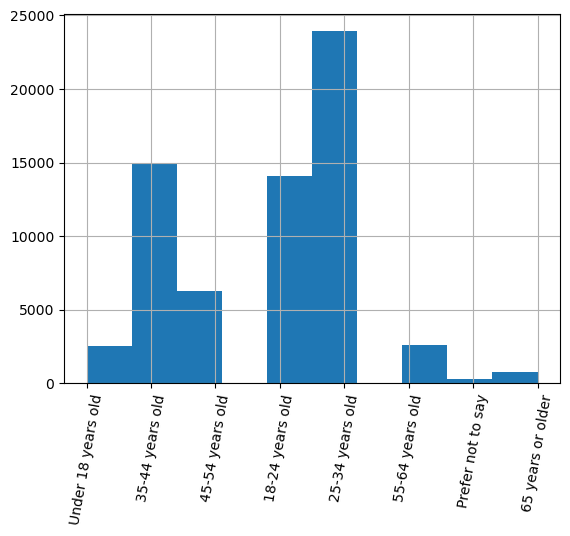

In [6]:
df['Age'].hist( xrot=80)
# Most participants are between 18 and 44 years old.

In [7]:
df['Employment'].describe()
# high number of unique values

count                   65437
unique                    110
top       Employed, full-time
freq                    39041
Name: Employment, dtype: object

<Axes: >

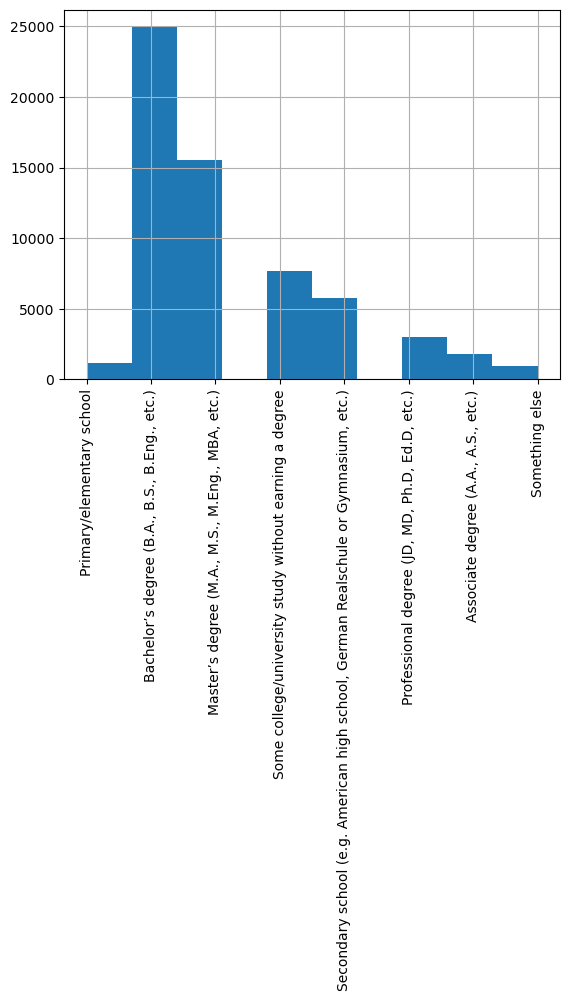

In [8]:
df['EdLevel'].hist( xrot=90)
# Most participants own a Bachelors or Maters degree

<Axes: >

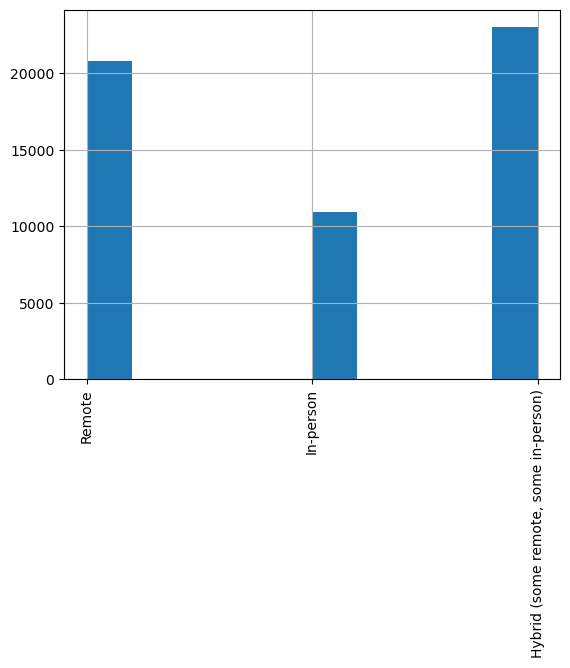

In [9]:
df['RemoteWork'].hist( xrot=90)
# a large amount of people work at leat some amount remote

<Axes: >

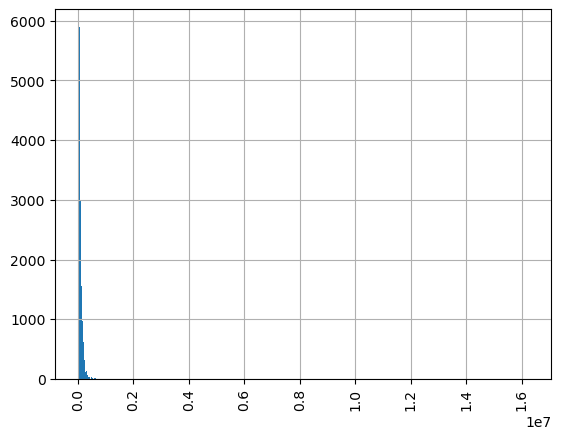

In [10]:
df['ConvertedCompYearly'].hist( xrot=90, bins =500)
# The distribution of ConvertedCompYearly (annual compensation) is highly right-skewed, which is typical for salary data.

<class 'pandas.core.series.Series'>
RangeIndex: 65437 entries, 0 to 65436
Series name: JobSat
Non-Null Count  Dtype  
--------------  -----  
29126 non-null  float64
dtypes: float64(1)
memory usage: 511.4 KB


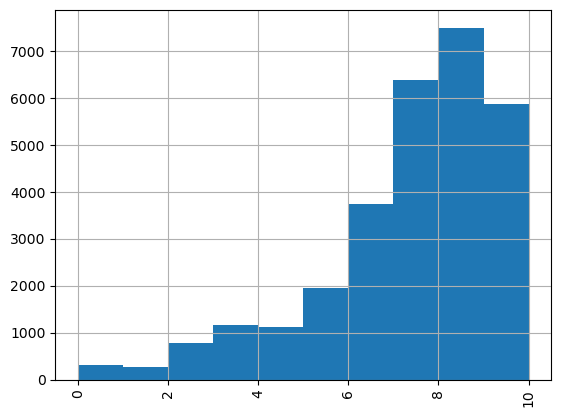

In [11]:
df['JobSat'].hist( xrot=90, bins =10)
# Most respondents are either satisfied or neutral with their job. 
# Fewer respondents reported being very dissatisfied or very satisfied.
# The JobSat column has 65437 - 29126 = 36,311 missing values, which could represent nearly half of the dataset.
df['JobSat'].info()

<Axes: >

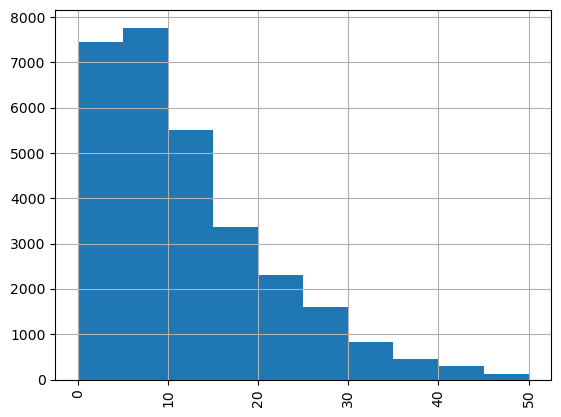

In [12]:
df['WorkExp'].hist( xrot=90, bins =10)
# The distribution of WorkExp (years of professional experience) is right-skewed, 
# meaning most respondents have relatively few years of experience, while a smaller number have many years.

There are several columns containing strings that can be easily translated into numerical values in a qualitative way. For this purpose, we create dictionaries and a function that performs the translation.

In [13]:
selfdescription_dict = {'I am a developer by profession' : 5, 'I used to be a developer by profession, but no longer am': 4, 
                        'I am not primarily a developer, but I write code sometimes as part of my work/studies': 3, 
                        'I code primarily as a hobby':2, 'I am learning to code': 1, 'None of these': 0}
age_dict = {'Under 18 years old' : 0, '18-24 years old': 18, '25-34 years old': 25, '35-44 years old': 35, '45-54 years old': 45, 
            '55-64 years old': 55, '65 years or older': 65, 'Prefer not to say': np.nan }
education_dict = {'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 6, 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 5, 
                  'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 4, 'Associate degree (A.A., A.S., etc.)': 3, 
                  'Some college/university study without earning a degree':2, 
                  'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1, 
                  'Primary/elementary school': 0, 'Something else': 3}
orgsize_dict = {'Just me - I am a freelancer, sole proprietor, etc.': 1, '2 to 9 employees' : 2, '10 to 19 employees': 10, 
                '20 to 99 employees': 20, '100 to 499 employees': 100, '500 to 999 employees': 500, '1,000 to 4,999 employees': 1000, 
                '5,000 to 9,999 employees': 5000, '10,000 or more employees': 10000, 'I don’t know': np.nan}
infl_dict = {'I have little or no influence': 0, 'I have some influence': 1, 'I have a great deal of influence': 2}
knowledge_dict = {'Agree':1, 'Strongly agree': 2,  'Neither agree nor disagree': 0,  'Disagree': -1, 
                  'Strongly disagree': -2, np.nan: 0}

def map_column_to_numbers(df, column, mapping_dict):
    """
    Replaces values in a DataFrame column using a given mapping dictionary.

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        column (str): Name of the column to be mapped.
        mapping_dict (dict): Dictionary mapping strings to numerical values.

    Returns:
        pd.Series: The mapped column as a Pandas Series.
    """
    return df[column].replace(mapping_dict)

In [14]:
df['MainBranch'] = map_column_to_numbers(df, 'MainBranch', selfdescription_dict)

df['Age'] = map_column_to_numbers(df, 'Age', age_dict)

df['EdLevel'] = map_column_to_numbers(df, 'EdLevel', education_dict)

df['OrgSize'] = map_column_to_numbers(df, 'OrgSize', orgsize_dict)

df['PurchaseInfluence'] = map_column_to_numbers(df, 'PurchaseInfluence', infl_dict)

for i in list(range(1, 10)): 
    df['Knowledge_'+str(i)] = map_column_to_numbers(df, 'Knowledge_'+str(i), knowledge_dict)

Year entries will be converted to integers where possible. If the entry is a string (e.g., indicating a range), it will be mapped to predefined boundary values.

In [15]:
def clean_years_code(column):
    return column.replace({
        'Less than 1 year': 0,
        'More than 50 years': 60
    }).apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

df['YearsCode'] = clean_years_code(df['YearsCode'])
df['YearsCodePro'] = clean_years_code(df['YearsCodePro'])

Some columns contain information about tools that respondents use. These tools cannot be meaningfully ordered numerically. Creating dummy variables would significantly increase the dimensionality of the dataset and lead to sparse data. A more advanced approach would involve splitting the strings and filtering for the most relevant tools. However, we will choose a much simpler strategy here: we will count the number of tools mentioned by each respondent. This count might also serve as an indicator of job satisfaction.

In [16]:
tools = ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 
         'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 
         'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 
         'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 
         'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 
         'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 
         'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 
         'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired']

def count_tools_columns(df, columns):
    """
    Counts the number of tools (or entries) in specified columns 
    and creates new columns with the counts.

    Args:
        df (pd.DataFrame): The DataFrame containing the tool columns.
        columns (list): List of column names to process.

    Returns:
        pd.DataFrame: DataFrame with additional columns '<ColumnName>_Count'.
    """
    for col in columns:
        df[col] = df[col].apply(
            lambda x: str(x).count(';')+1 if pd.notnull(x) else 0
        )
    return df

count_tools_columns(df, tools)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIThreat,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
0,5,0.0,"Employed, full-time",Remote,Hobby,0.0,Books / Physical media,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,35.0,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,4.0,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,7,8,7,3,1,1,3,3,3,4,5,3,0,0,0,0,0,0,6,6,6,3,3,3,2,1,0,0,0,2,1,1,0,0,0,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,1.0,-1.0,1.0,1.0,1.0,0.0,-1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,5,45.0,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Other...,5.0,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,37,27,Developer Experience,NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,1,1,1,1,1,1,1,1,0,0,0,4,3,3,0,0,0,"No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,18.0,"Student, full-time",NaN,NaN,2.0,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,4,0,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,Canada,10,7,7,4,3,3,3,2,1,5,4,4,1,0,0,4,0,0,3,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,Bad at handling complex tasks,Learning about a codebase;Project planning;Wri...,Testing code;Committing and reviewing code;Pre...,No,Don’t trust the output or answers,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18.0,"Student, full-time",NaN,NaN,1.0,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User

We will now fill missing values where it is reasonable to do so.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 95 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      65437 non-null  int64  
 1   Age                             65115 non-null  float64
 2   Employment                      65437 non-null  object 
 3   RemoteWork                      54806 non-null  object 
 4   CodingActivities                54466 non-null  object 
 5   EdLevel                         60784 non-null  float64
 6   LearnCode                       60488 non-null  object 
 7   LearnCodeOnline                 49237 non-null  object 
 8   TechDoc                         40897 non-null  object 
 9   YearsCode                       65437 non-null  int64  
 10  YearsCodePro                    65437 non-null  int64  
 11  DevType                         59445 non-null  object 
 12  OrgSize                         

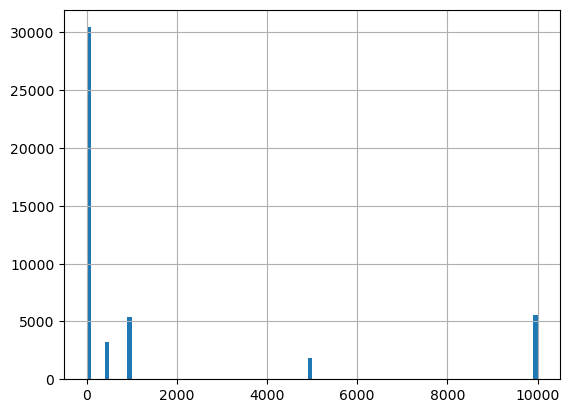

In [18]:
# The OrgSize-distribution is right-skewed. We replace missing values by the median.
df['OrgSize'].hist(bins = 100)
df['OrgSize'] = df['OrgSize'].fillna(df['OrgSize'].median())
# Missing values in influence are considered as little or no influence
df['PurchaseInfluence'] = df['PurchaseInfluence'].fillna(0)

## 4. Correlation Analysis
This section includes:
- Correlation matrices
- Heatmaps
- Selected plots

We focus on identifying potential predictor variables with noticeable correlation to job satisfaction.

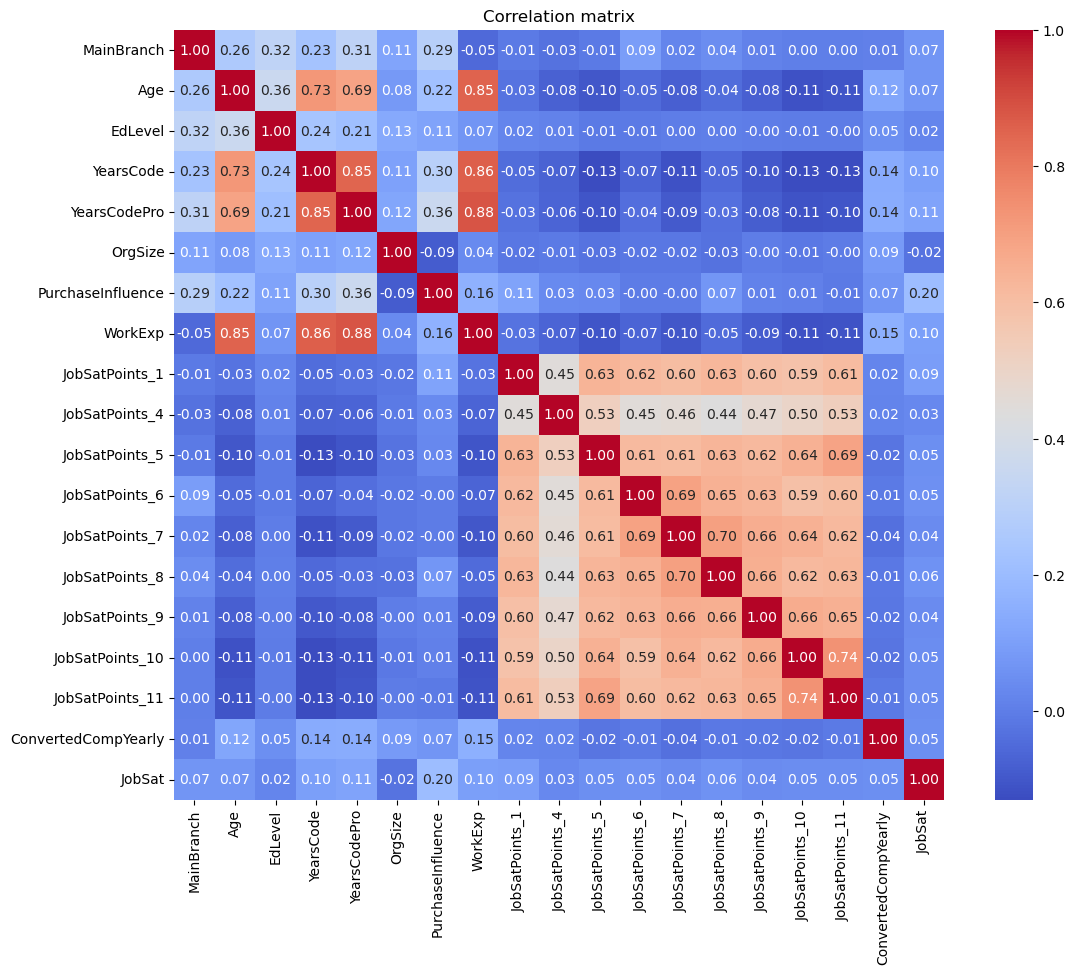

In [19]:

df0 = df[['MainBranch', 'Age', 'EdLevel', 'YearsCode', 'YearsCodePro', 'OrgSize', 'PurchaseInfluence', 'WorkExp', 'JobSatPoints_1',
         'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 
          'JobSatPoints_10', 'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat']]
corr = df0.corr(numeric_only=True)
plt.figure(figsize=(13, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()


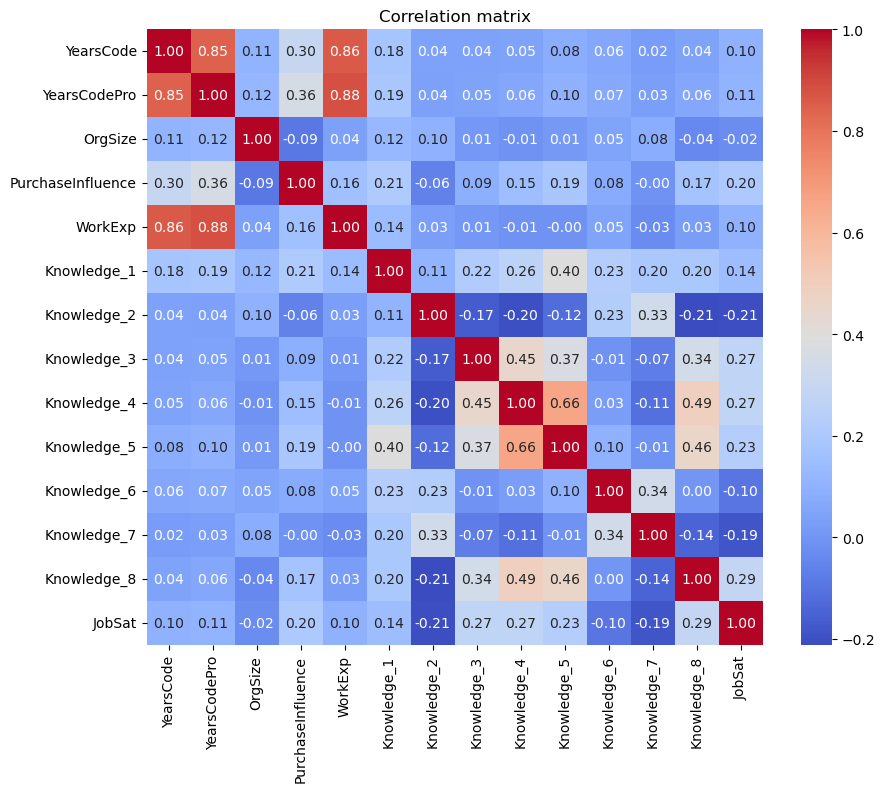

In [20]:
df1 = df[['YearsCode', 'YearsCodePro', 'OrgSize', 'PurchaseInfluence', 'WorkExp', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8','JobSat']]
corr = df1.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()

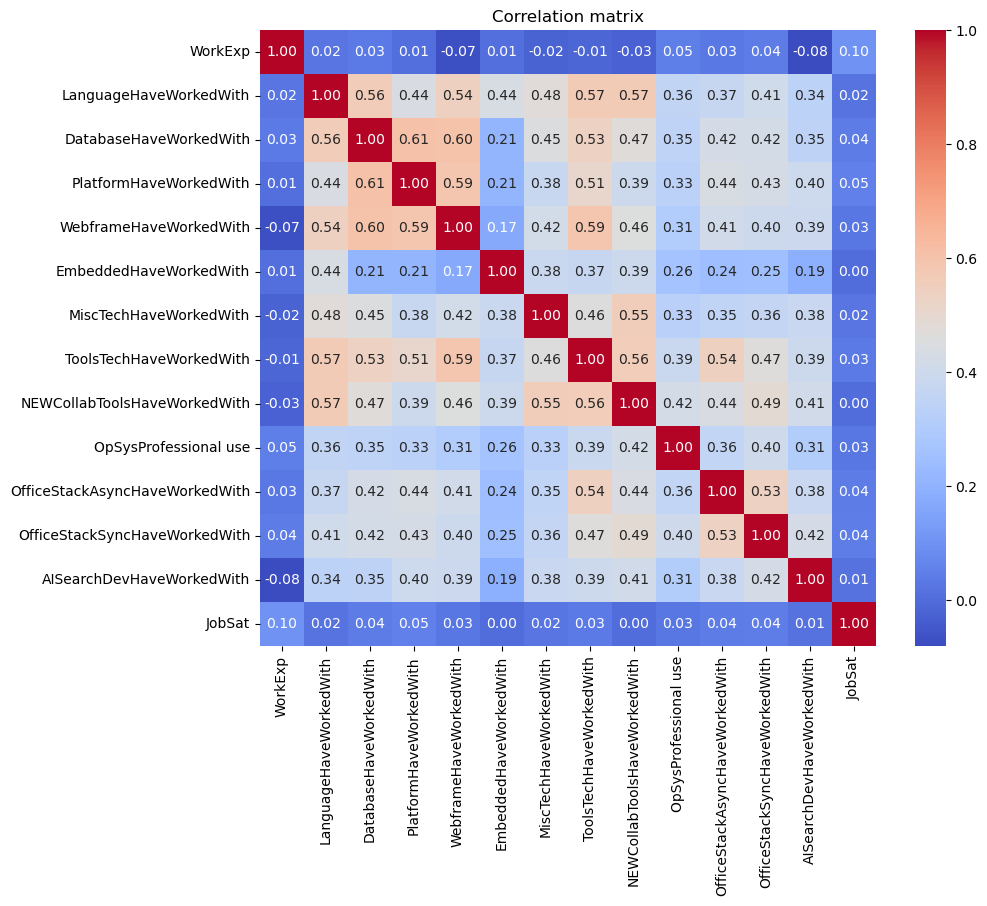

In [21]:
df2 = df[['WorkExp', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
          'EmbeddedHaveWorkedWith', 'MiscTechHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith', 
          'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'AISearchDevHaveWorkedWith', 'JobSat']]
corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()

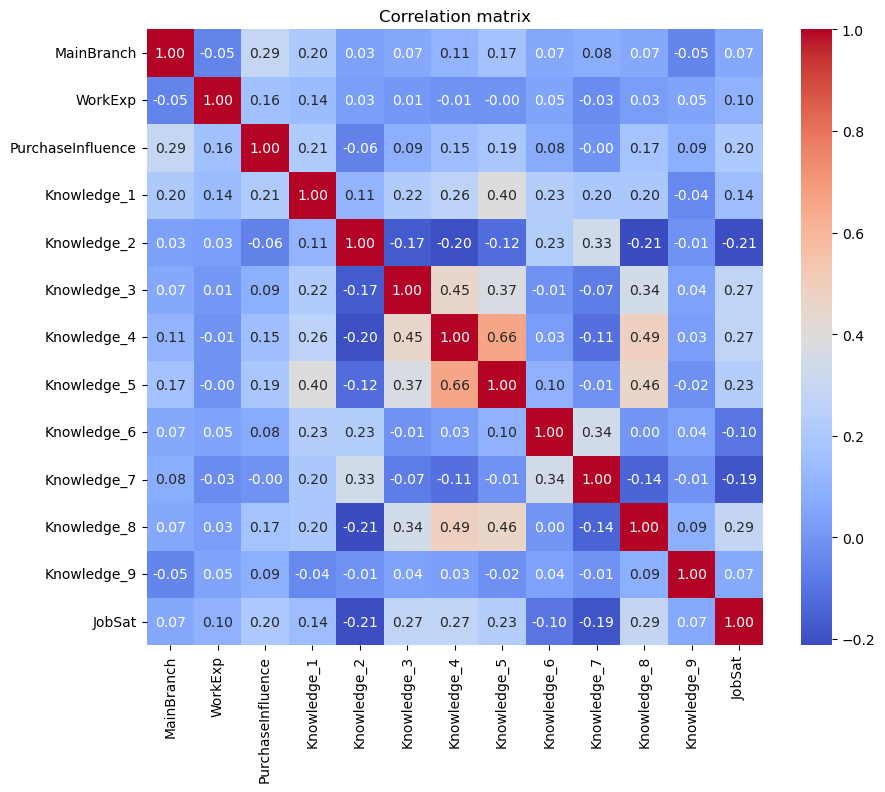

In [22]:
df3 = df[['MainBranch', 'WorkExp', 'PurchaseInfluence', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'JobSat']]
corr = df3.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation matrix")
plt.show()

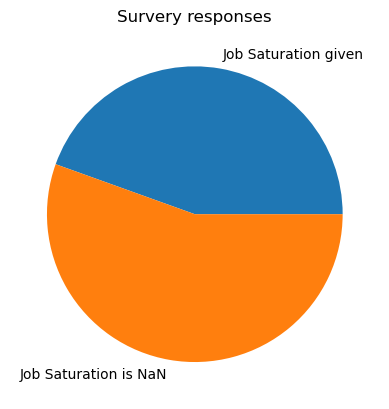

In [24]:
x = [65437-df['JobSat'].isna().sum(), df['JobSat'].isna().sum()]
labels = ['Job Saturation given', 'Job Saturation is NaN']

fig, ax = plt.subplots()
ax.pie(x, labels = labels)
ax.set_title('Survery responses')
plt.show()

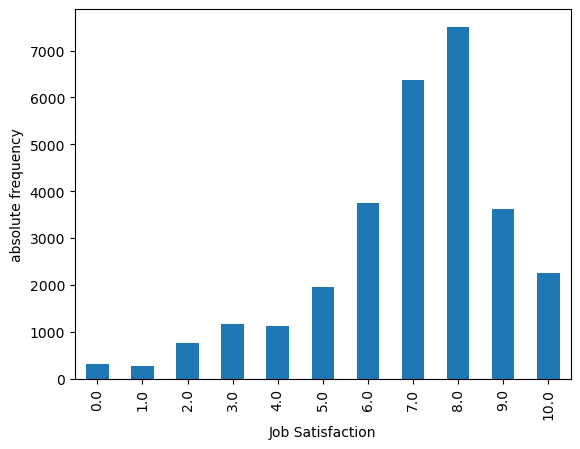

<Axes: >

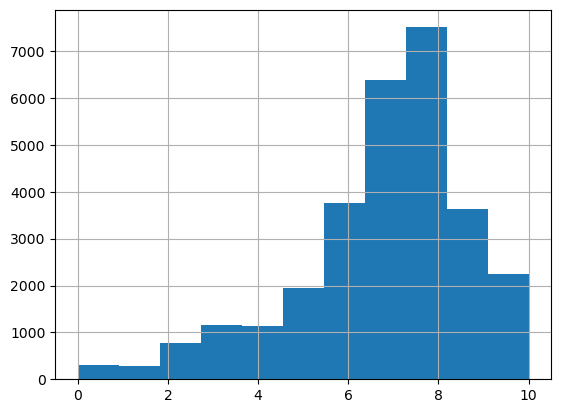

In [25]:
df['JobSat'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Job Satisfaction')
plt.ylabel('absolute frequency')
plt.show()

df['JobSat'].hist(bins=11)

## 5. Summary of Findings
The analysis shows that there are only **weak correlations** between job satisfaction and other variables. Slight trends were observed with **influence in the organization**,  **work experience**, and **Knowledge-columns**, but no strong or actionable relationships were identified. This lack of correlation will likely limit the performance of any predictive model.